# **Introducao a Analise Preditiva**

**prof: Sergio Assuncao Monteiro, DSc**

linkedin: https://www.linkedin.com/in/sergio-assun%C3%A7%C3%A3o-monteiro-b781897b/

lattes: http://lattes.cnpq.br/9489191035734025

# **Regressao Linear**

In [38]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [39]:
# y = f(x) = mx + n
def funcao_regressao_linear(x, coef_angular, coef_linear):
  y = coef_angular * x + coef_linear
  return y

In [40]:
x=[10,15,16,18]
y=[100,180,200,300]
coef_angular, coef_linear, r, p, std_err = stats.linregress(x, y) 

In [41]:
print(f'x={x}')
print(f'y={y}')

x=[10, 15, 16, 18]
y=[100, 180, 200, 300]


In [42]:
nx = len(x)
ny = len(y)
print("nx: ",nx)
print("ny: ",ny)

nx:  4
ny:  4


In [43]:
x_novo=x+[20]
print(f'x_novo={x_novo}')

x_novo=[10, 15, 16, 18, 20]


In [44]:
modelo=[]
for r in x_novo:
  valor=funcao_regressao_linear(r,coef_angular, coef_linear)
  modelo.append(valor)

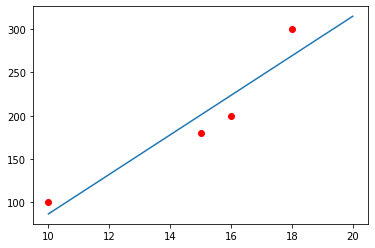

In [45]:
plt.scatter(x, y,c="red")
plt.plot(x_novo, modelo)
plt.show()

# **Regressao Nao-Linear**

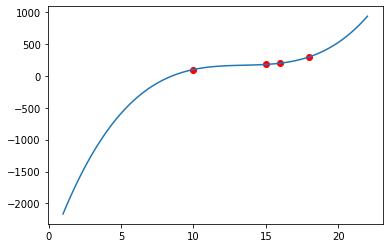

In [46]:
modelo_nl = np.poly1d(np.polyfit(x, y, 3))

linha = np.linspace(1, 22, 100)

plt.scatter(x, y,c="red")
plt.plot(linha, modelo_nl(linha))
plt.show()


# **Abordagem por Séries Temporais**

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.api import qqplot

In [48]:
df = sm.datasets.sunspots.load_pandas().data[['SUNACTIVITY']]
df.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [49]:
with pd.option_context('display.max_rows',10):
  print(df)

            SUNACTIVITY
1700-12-31          5.0
1701-12-31         11.0
1702-12-31         16.0
1703-12-31         23.0
1704-12-31         36.0
...                 ...
2004-12-31         40.4
2005-12-31         29.8
2006-12-31         15.2
2007-12-31          7.5
2008-12-31          2.9

[309 rows x 1 columns]


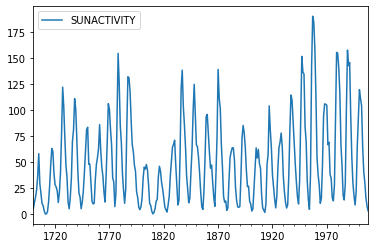

In [50]:
df.plot()

In [51]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['SUNACTIVITY'], 
                          trace=True,
                          suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2578.271, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2835.116, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2730.690, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2743.278, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2833.116, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2611.999, Time=0.68 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2575.206, Time=1.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2597.162, Time=0.61 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.50 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2577.122, Time=2.97 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2574.924, Time=1.90 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.29 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2576.690, Time=1.46 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, T

In [53]:
from statsmodels.tsa.arima.model import ARIMA
modelo = ARIMA(df['SUNACTIVITY'], order=(2,1,3))
modelo_fit = modelo.fit()
print(modelo_fit.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1280.477
Date:                Wed, 11 Jan 2023   AIC                           2572.954
Time:                        16:34:02   BIC                           2595.335
Sample:                    12-31-1700   HQIC                          2581.903
                         - 12-31-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6145      0.026     62.096      0.000       1.564       1.665
ar.L2         -0.9354      0.022    -41.820      0.000      -0.979      -0.892
ma.L1         -1.4392      0.059    -24.590      0.0

In [54]:
modelo_fit.predict()

1700-12-31     0.000000
1701-12-31     5.001522
1702-12-31    14.216050
1703-12-31    17.941763
1704-12-31    25.179053
                ...    
2004-12-31    32.868810
2005-12-31    23.051819
2006-12-31    25.966227
2007-12-31    21.072536
2008-12-31    24.232068
Freq: A-DEC, Name: predicted_mean, Length: 309, dtype: float64

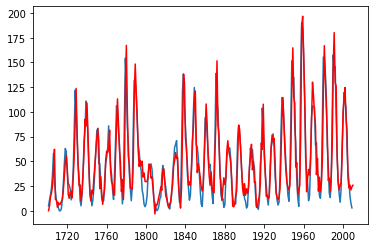

In [55]:
inicio=0
fim=len(df)-1
predicoes=modelo_fit.predict(start=0,
                         end=fim+1).rename('Predições ARIMA')

plt.plot(df)
plt.plot(predicoes,color='red')

In [56]:
predicoes[fim+1]

25.82388536685737

**Averiguação de Qualidade**

In [57]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [59]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(df, predicoes[:-1])))

RMSE: 15.401239743456998
